Loading the dataset

In [1]:
import pandas as pd
import seaborn as sns
import glob

In [2]:
train_bp_dir = r"Lung Disease Dataset\train\Bacterial Pneumonia"
val_bp_dir = r"Lung Disease Dataset\val\Bacterial Pneumonia"
test_bp_dir = r"Lung Disease Dataset\test\Bacterial Pneumonia"

train_covid_dir = r"Lung Disease Dataset\train\Corona Virus Disease"
val_covid_dir = r"Lung Disease Dataset\val\Corona Virus Disease"
test_covid_dir = r"Lung Disease Dataset\test\Corona Virus Disease"

train_norm_dir = r"Lung Disease Dataset\train\Normal"
val_norm_dir = r"Lung Disease Dataset\val\Normal"
test_norm_dir = r"Lung Disease Dataset\test\Normal"

train_tuber_dir = r"Lung Disease Dataset\train\Tuberculosis"
val_tuber_dir = r"Lung Disease Dataset\val\Tuberculosis"
test_tuber_dir = r"Lung Disease Dataset\test\Tuberculosis"

train_vp_dir = r"Lung Disease Dataset\train\Viral Pneumonia"
val_vp_dir = r"Lung Disease Dataset\val\Viral Pneumonia"
test_vp_dir = r"Lung Disease Dataset\test\Viral Pneumonia"

In [3]:
train_bp = glob.glob(train_bp_dir + '\*jpeg')
val_bp = glob.glob(val_bp_dir + '\*jpeg')
test_bp = glob.glob(test_bp_dir + '\*jpeg')

train_covid = glob.glob(train_covid_dir + '\*jpeg')
val_covid = glob.glob(val_covid_dir + '\*jpeg')
test_covid = glob.glob(test_covid_dir + '\*jpeg')

train_norm = glob.glob(train_norm_dir + '\*jpeg')
val_norm = glob.glob(val_norm_dir + '\*jpeg')
test_norm = glob.glob(test_norm_dir + '\*jpeg')

train_tuber =glob.glob(train_tuber_dir + '\*jpeg')
val_tuber = glob.glob(val_tuber_dir + '\*jpeg')
test_tuber = glob.glob(test_tuber_dir + '\*jpeg')

train_vp = glob.glob(train_vp_dir + '\*jpeg')
val_vp = glob.glob(val_vp_dir + '\*jpeg')
test_vp = glob.glob(test_vp_dir + '\*jpeg')

In [4]:
labels = {0:'Bacterial_Pneumonia',
          1:'Covid',
          2:'Normal',
          3:'Tuberculosis',
          4:'Viral_Pneumonia'
          }

In [5]:
xray_images = []

def add_images_from_list(image_list, label, max_images=1000):
    count = 0
    for image in image_list:
        xray_images.append([image, label])
        count += 1
        if count >= max_images:
            break


add_images_from_list(train_bp + val_bp + test_bp, 0, max_images=1000)
add_images_from_list(train_covid + val_covid + test_covid, 1, max_images=1000)
add_images_from_list(train_norm + val_norm + test_norm, 2, max_images=1000)
add_images_from_list(train_tuber + val_tuber + test_tuber, 3, max_images=1000)
add_images_from_list(train_vp + val_vp + test_vp, 4, max_images=1000)

In [6]:
len(xray_images)

4609

In [7]:
xray_db = pd.DataFrame(xray_images, columns=['image', 'label'])

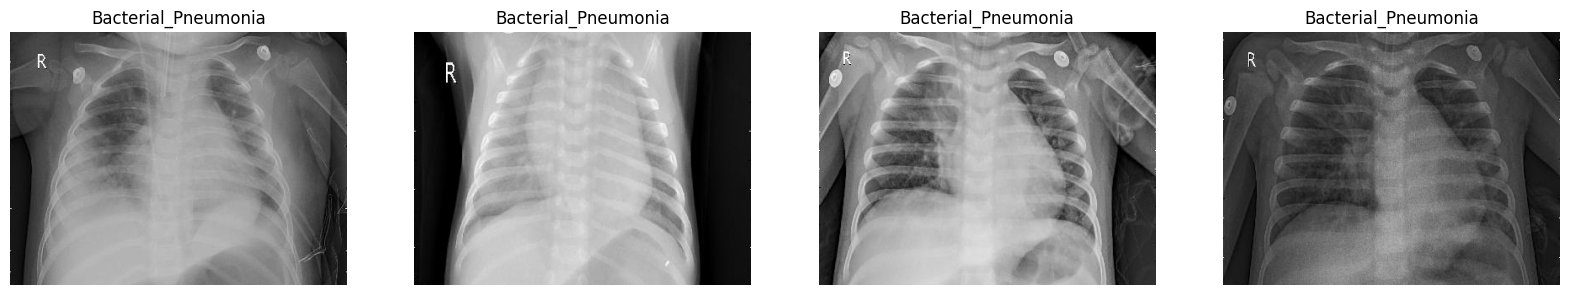

In [9]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,16))
 
for i,img_path in enumerate(xray_db[xray_db['label'] == 0][0:4]['image']):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(labels[0])

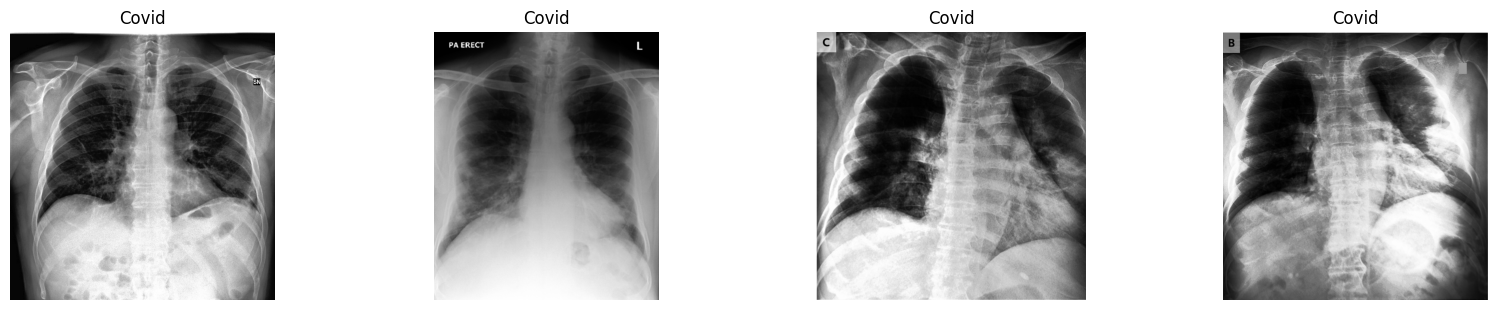

In [232]:
plt.figure(figsize=(20,16))

for i,img_path in enumerate(xray_db[xray_db['label'] == 1][0:4]['image']):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(labels[1])

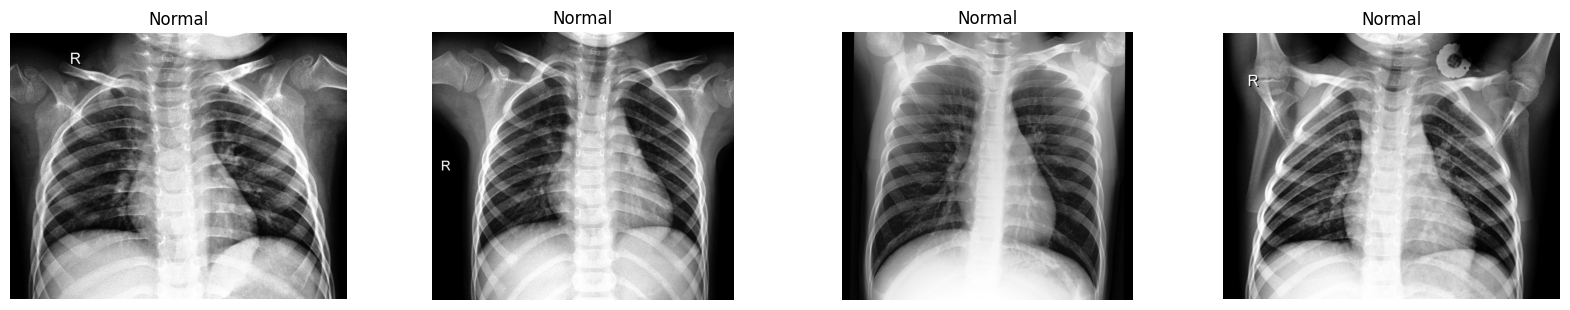

In [233]:
plt.figure(figsize=(20,16))

for i,img_path in enumerate(xray_db[xray_db['label'] == 2][0:4]['image']):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(labels[2])

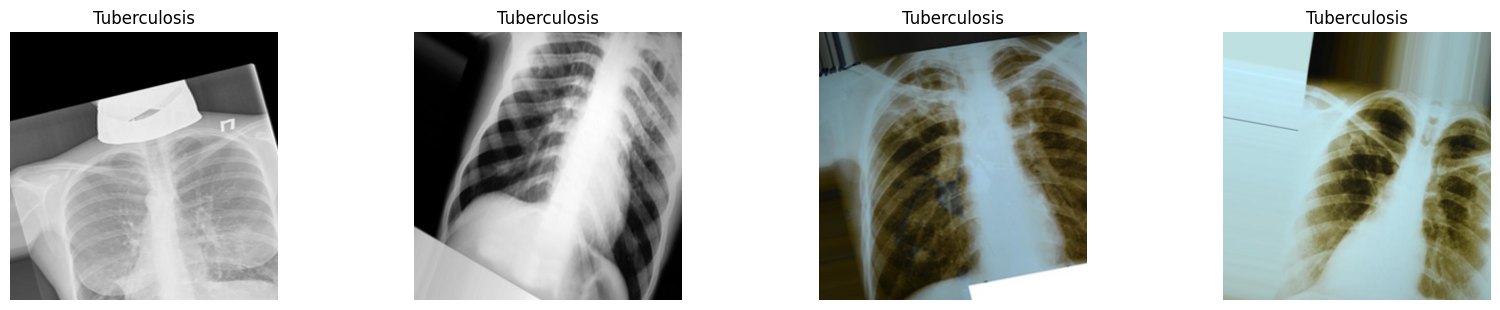

In [235]:
plt.figure(figsize=(20,16))

for i,img_path in enumerate(xray_db[xray_db['label'] == 3][0:4]['image']):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(labels[3])

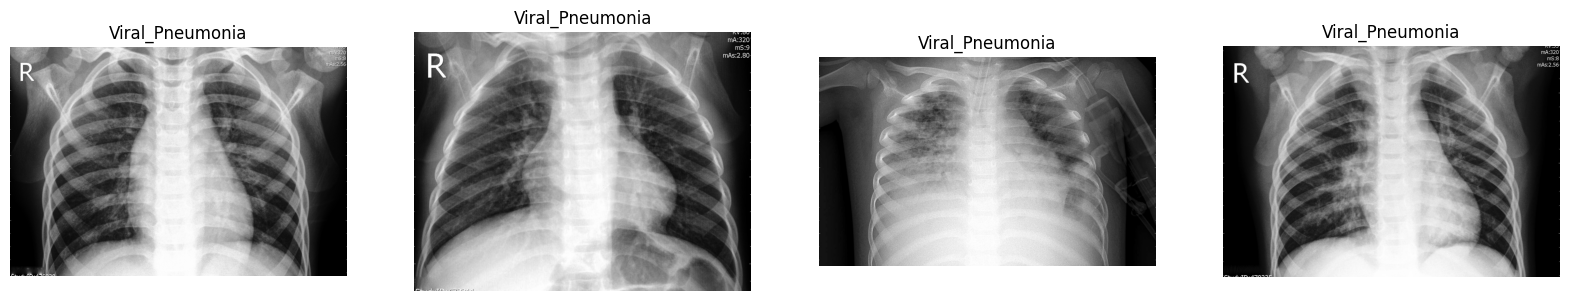

In [236]:
plt.figure(figsize=(20,16))

for i,img_path in enumerate(xray_db[xray_db['label'] == 4][0:4]['image']):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(labels[4])

Text(0.5, 1.0, 'Class distribution - all data')

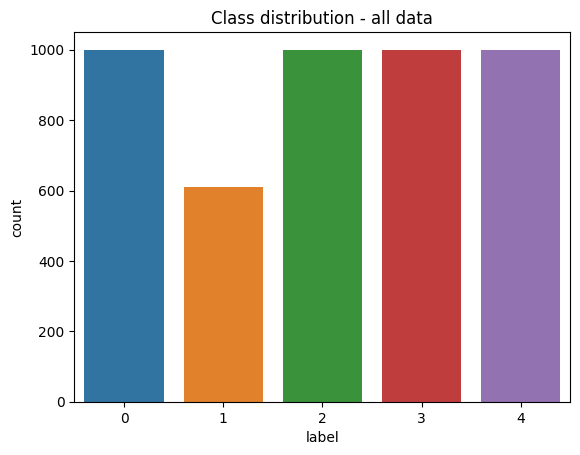

In [8]:
sns.countplot(xray_db, x='label', ).set_title("Class distribution - all data")

In [16]:
covid_images = [[image, 1] for image in train_covid + val_covid + test_covid]

In [17]:
covid_df = pd.DataFrame(covid_images, columns=['image', 'label'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [19]:
import os
import tensorflow as tf

def augment_images(image_paths, label, target_count, datagen, output_dir):
    augmented_images = []
    num_existing_images = len(image_paths)
    num_to_generate = target_count - num_existing_images
    
    os.makedirs(output_dir, exist_ok=True)
    
    for image_path in image_paths:
        if num_to_generate <= 0:
            break
        image = tf.keras.preprocessing.image.load_img(image_path)
        image_array = tf.keras.preprocessing.image.img_to_array(image)
        image_array = image_array.reshape((1,) + image_array.shape)
        
        for i, batch in enumerate(datagen.flow(image_array, batch_size=1)):
            augmented_image = tf.keras.preprocessing.image.array_to_img(batch[0])
            
            img_filename = os.path.basename(image_path)
            img_name, img_ext = os.path.splitext(img_filename)
            save_path = os.path.join(output_dir, f"{img_name}_augmented_{i}{img_ext}")
            augmented_image.save(save_path)
            
            augmented_images.append((save_path, label))
            
            num_to_generate -= 1
            if num_to_generate <= 0:
                break
    
    return augmented_images[:target_count]


In [20]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

output_dir = "augmented_images"

augmented_covid_images = augment_images(covid_df['image'].tolist(), 1, 1000, datagen, output_dir)

augmented_covid_df = pd.DataFrame(augmented_covid_images, columns=['image', 'label'])

augmented_covid_df.to_csv('augmented_covid_images.csv', index=False)

In [21]:
xray_db = pd.concat([xray_db, augmented_covid_df]).reset_index(drop=True)

In [22]:
len(xray_db)

5000

In [23]:
xray_db

,image,label
0,Lung Disease Dataset\train\Bacterial Pneumonia...,0
1,Lung Disease Dataset\train\Bacterial Pneumonia...,0
2,Lung Disease Dataset\train\Bacterial Pneumonia...,0
3,Lung Disease Dataset\train\Bacterial Pneumonia...,0
4,Lung Disease Dataset\train\Bacterial Pneumonia...,0
...,...,...
4995,augmented_images\0100_augmented_386.jpeg,1
4996,augmented_images\0100_augmented_387.jpeg,1
4997,augmented_images\0100_augmented_388.jpeg,1
4998,augmented_images\0100_augmented_389.jpeg,1


Preparation of image files

In [25]:
import cv2
import numpy as np

def process_data(img_path, target_size=(256, 256)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = np.reshape(img, (*target_size, 1))
    return img

    
def compose_dataset(df):
    data = []
    labels = []
    
    for img_path, label in df.values:
        processed_img = process_data(img_path)
        
        if processed_img is not None:
            data.append(processed_img)
            labels.append(label)
    
    return np.array(data), np.array(labels)


X, y = compose_dataset(xray_db)

In [26]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (5000, 256, 256, 1)
Shape of y: (5000,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [28]:
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 3825
Validation set size: 675
Test set size: 500


In [29]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

Referencial model

In [48]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import keras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[keras.metrics.F1Score()])


callbacks_list = [
    ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor='val_f1_score',
        save_best_only=True,
        mode='max'
    )
]

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    batch_size=64,
    callbacks=callbacks_list
)

model = tf.keras.models.load_model("checkpoint_path.keras")

Epoch 1/10
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - f1_score: 0.3129 - loss: 12.3497

c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:254: UserWarning: Can save best model only when `monitor` is a scalar value. Received: [0.6470588  0.64971745 0.63580245 0.6332046  0.01418439]. Falling back to `save_best_only=False`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - f1_score: 0.3158 - loss: 12.1680 - val_f1_score: 0.5160 - val_loss: 1.5864
Epoch 2/10
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - f1_score: 0.5795 - loss: 1.2768

c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:254: UserWarning: Can save best model only when `monitor` is a scalar value. Received: [0.7058823  0.66972464 0.83544296 0.6524064  0.08163264]. Falling back to `save_best_only=False`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - f1_score: 0.5801 - loss: 1.2718 - val_f1_score: 0.5890 - val_loss: 1.0160
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - f1_score: 0.6475 - loss: 0.8903

c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:254: UserWarning: Can save best model only when `monitor` is a scalar value. Received: [0.7084468  0.77887785 0.85185176 0.6260162  0.43119258]. Falling back to `save_best_only=False`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - f1_score: 0.6476 - loss: 0.8899 - val_f1_score: 0.6793 - val_loss: 0.7927
Epoch 4/10
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - f1_score: 0.6336 - loss: 0.9451

c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:254: UserWarning: Can save best model only when `monitor` is a scalar value. Received: [0.6830466  0.73352426 0.84070784 0.58666664 0.04195803]. Falling back to `save_best_only=False`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - f1_score: 0.6332 - loss: 0.9469 - val_f1_score: 0.5772 - val_loss: 1.0789
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - f1_score: 0.6421 - loss: 0.9442

c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:254: UserWarning: Can save best model only when `monitor` is a scalar value. Received: [0.7354838  0.77288127 0.8207171  0.63967603 0.5263157 ]. Falling back to `save_best_only=False`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - f1_score: 0.6424 - loss: 0.9429 - val_f1_score: 0.6990 - val_loss: 0.7335
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - f1_score: 0.6815 - loss: 0.7954

c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:254: UserWarning: Can save best model only when `monitor` is a scalar value. Received: [0.7150837  0.6396396  0.7817258  0.672      0.31313127]. Falling back to `save_best_only=False`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - f1_score: 0.6812 - loss: 0.7963 - val_f1_score: 0.6243 - val_loss: 0.9654
Epoch 7/10
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - f1_score: 0.6867 - loss: 0.8222

c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:254: UserWarning: Can save best model only when `monitor` is a scalar value. Received: [0.20731707 0.6849314  0.84545445 0.6884272  0.51707315]. Falling back to `save_best_only=False`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - f1_score: 0.6864 - loss: 0.8220 - val_f1_score: 0.5886 - val_loss: 0.9529
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - f1_score: 0.6867 - loss: 0.7583

c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:254: UserWarning: Can save best model only when `monitor` is a scalar value. Received: [0.6171874  0.7999999  0.65882343 0.6870748  0.35999995]. Falling back to `save_best_only=False`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - f1_score: 0.6865 - loss: 0.7590 - val_f1_score: 0.6246 - val_loss: 0.8988
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - f1_score: 0.6901 - loss: 0.7332

c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:254: UserWarning: Can save best model only when `monitor` is a scalar value. Received: [0.75555545 0.7928571  0.83199996 0.6811594  0.4978165 ]. Falling back to `save_best_only=False`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - f1_score: 0.6901 - loss: 0.7337 - val_f1_score: 0.7119 - val_loss: 0.7167
Epoch 10/10
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - f1_score: 0.6815 - loss: 0.7782

c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:254: UserWarning: Can save best model only when `monitor` is a scalar value. Received: [0.74999994 0.784      0.80149806 0.6876971  0.29999995]. Falling back to `save_best_only=False`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - f1_score: 0.6820 - loss: 0.7774 - val_f1_score: 0.6646 - val_loss: 0.7691


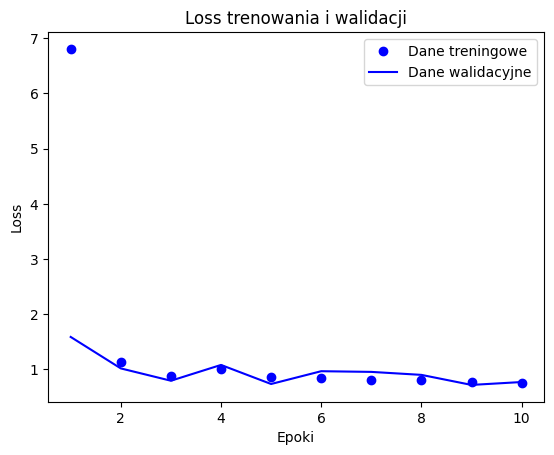

In [49]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Dane treningowe')
plt.plot(epochs, val_loss, 'b', label='Dane walidacyjne')
plt.title('Loss trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
y_pred = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[82  1 27  5  2]
 [ 0 70  3 26  2]
 [ 5  0 84  7  1]
 [15 12  6 65  4]
 [30  1 17 19 16]]
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       117
           1       0.83      0.69      0.76       101
           2       0.61      0.87      0.72        97
           3       0.53      0.64      0.58       102
           4       0.64      0.19      0.30        83

    accuracy                           0.63       500
   macro avg       0.65      0.62      0.60       500
weighted avg       0.65      0.63      0.61       500



Convolutional neural network, Model 1

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


params1 = {'filters': [32, 64, 128], 'kernel_sizes': [(5,5), (5, 5), (3, 3)]}

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

model1 = Sequential()
model1.add(Conv2D(filters=params1['filters'][0], kernel_size=params1['kernel_sizes'][0], padding='same', activation='relu', input_shape=(256, 256, 1)))
model1.add(Conv2D(filters=params1['filters'][0], kernel_size=params1['kernel_sizes'][0], padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=params1['filters'][1], kernel_size=params1['kernel_sizes'][1], padding='same', activation='relu'))
model1.add(Conv2D(filters=params1['filters'][1], kernel_size=params1['kernel_sizes'][1], padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=params1['filters'][2], kernel_size=params1['kernel_sizes'][2], padding='same', activation='relu'))
model1.add(Conv2D(filters=params1['filters'][2], kernel_size=params1['kernel_sizes'][2], padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.33))
model1.add(Dense(5, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=[keras.metrics.F1Score()])

history1 = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping_callback])
model1.save("model1.keras")

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 230s 4s/step - f1_score: 0.3639 - loss: 1.3653 - val_f1_score: 0.6860 - val_loss: 0.7621
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - f1_score: 0.6797 - loss: 0.7810 - val_f1_score: 0.7657 - val_loss: 0.5916
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - f1_score: 0.7401 - loss: 0.6446 - val_f1_score: 0.7891 - val_loss: 0.5864
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 227s 4s/step - f1_score: 0.7761 - loss: 0.5632 - val_f1_score: 0.8092 - val_loss: 0.5070
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - f1_score: 0.7888 - loss: 0.5113 - val_f1_score: 0.8086 - val_loss: 0.4887
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - f1_score: 0.8021 - loss: 0.4827 - val_f1_score: 0.7943 - val_loss: 0.5475
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - f1_score: 0.8430 - loss: 0.4073 - val_f1_score: 0.8279 - val_loss: 0.4721
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - f1_score: 0.8502 - loss: 0.3701 - val_f1_score: 0.8145 - v

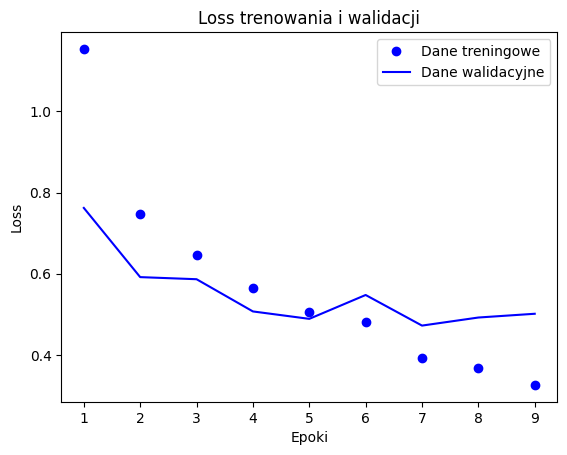

In [44]:
import matplotlib.pyplot as plt

train_loss = history1.history['loss']
val_loss = history1.history['val_loss']


epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Dane treningowe')
plt.plot(epochs, val_loss, 'b', label='Dane walidacyjne')
plt.title('Loss trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
model1 = tf.keras.models.load_model("model1.keras")

y_pred = model1.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 539ms/step


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[74  1  6  1 35]
 [ 2 79  0 17  3]
 [ 0  0 88  3  6]
 [ 0  4  2 90  6]
 [14  1  6  5 57]]
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       117
           1       0.93      0.78      0.85       101
           2       0.86      0.91      0.88        97
           3       0.78      0.88      0.83       102
           4       0.53      0.69      0.60        83

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.77       500
weighted avg       0.79      0.78      0.78       500



Convolutional neural network, Model 2

In [32]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

params2 = {'filters': [32, 64, 128], 'kernel_sizes': [(3, 3), (3, 3), (3,3)]}

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

model2 = Sequential()
model2.add(Conv2D(filters=params2['filters'][0], kernel_size=params2['kernel_sizes'][0], padding='same', activation='relu', input_shape=(256, 256, 1)))
model2.add(Conv2D(filters=params2['filters'][0], kernel_size=params2['kernel_sizes'][0], padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=params2['filters'][1], kernel_size=params2['kernel_sizes'][1], padding='same', activation='relu'))
model2.add(Conv2D(filters=params2['filters'][1], kernel_size=params2['kernel_sizes'][1], padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=params2['filters'][2], kernel_size=params2['kernel_sizes'][2], padding='same', activation='relu'))
model2.add(Conv2D(filters=params2['filters'][2], kernel_size=params2['kernel_sizes'][2], padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.33))
model2.add(Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=[keras.metrics.F1Score()])

# Trenowanie modelu 2
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping_callback])
model2.save("model2.keras")


c:\Users\marle\moje\studia_data-science\Wprowadzenie-do-uczenia-maszynowego\projekt\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - f1_score: 0.3649 - loss: 1.3621 - val_f1_score: 0.7046 - val_loss: 0.6969
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - f1_score: 0.6863 - loss: 0.7248 - val_f1_score: 0.7795 - val_loss: 0.5728
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - f1_score: 0.7489 - loss: 0.6302 - val_f1_score: 0.7748 - val_loss: 0.5562
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - f1_score: 0.7649 - loss: 0.5613 - val_f1_score: 0.7965 - val_loss: 0.5201
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - f1_score: 0.7950 - loss: 0.5099 - val_f1_score: 0.7937 - val_loss: 0.5008
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - f1_score: 0.8071 - loss: 0.4883 - val_f1_score: 0.8168 - val_loss: 0.4544
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - f1_score: 0.8271 - loss: 0.4257 - val_f1_score: 0.8187 - val_loss: 0.4517
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - f1_score: 0.8415 - loss: 0.3916 - val_f1_score: 0.8212 - v

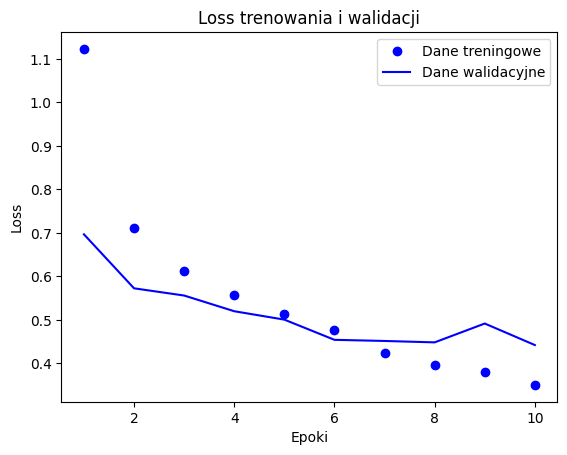

In [41]:
import matplotlib.pyplot as plt

train_loss = history2.history['loss']
val_loss = history2.history['val_loss']


epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Dane treningowe')
plt.plot(epochs, val_loss, 'b', label='Dane walidacyjne')
plt.title('Loss trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model2 = tf.keras.models.load_model("model2.keras")

y_pred = model2.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[87  1  3  0 26]
 [ 1 93  0  5  2]
 [ 3  3 83  0  8]
 [ 1  9  0 91  1]
 [17  2  7  1 56]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       117
           1       0.86      0.92      0.89       101
           2       0.89      0.86      0.87        97
           3       0.94      0.89      0.91       102
           4       0.60      0.67      0.64        83

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.83      0.82      0.82       500



The model with smaller kernels performed better. Its calculation time was lower, and it was mathematically simpler. Both models performed better than the reference model. The best model achieved 82% accuracy and performed best at classifying tuberculosis, but had the worst performance classifying viral pneumonia.